# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"# YOUR CODE HERE
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"# YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url) # YOUR CODE HERE
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json['coord']['lat']# YOUR CODE HERE
        city_lng = weather_json['coord']['lon']# YOUR CODE HERE
        city_max_temp = weather_json['main']['temp_max']# YOUR CODE HERE
        city_humidity = weather_json['main']['humidity']# YOUR CODE HERE
        city_clouds = weather_json['clouds']['all']# YOUR CODE HERE
        city_wind = weather_json['wind']['speed']# YOUR CODE HERE
        city_country = weather_json['sys']['country']# YOUR CODE HERE
        city_date = weather_json['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | isafjordur
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 8 of Set 1 | ust-nera
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | suoyarvi
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | road town
Processing Record 13 of Set 1 | itacare
Processing Record 14 of Set 1 | pyu
Processing Record 15 of Set 1 | tura
Processing Record 16 of Set 1 | quixeramobim
Processing Record 17 of Set 1 | la passe
Processing Record 18 of Set 1 | arraial do cabo
Processing Record 19 of Set 1 | antsiranana
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | haradok
Processing Record 22 of Set 1 |

Processing Record 40 of Set 4 | puerto baquerizo moreno
Processing Record 41 of Set 4 | anna regina
Processing Record 42 of Set 4 | susuman
Processing Record 43 of Set 4 | nova sintra
Processing Record 44 of Set 4 | viedma
Processing Record 45 of Set 4 | crane
Processing Record 46 of Set 4 | shetpe
Processing Record 47 of Set 4 | camiri
Processing Record 48 of Set 4 | stornoway
Processing Record 49 of Set 4 | talnakh
Processing Record 0 of Set 5 | dwarka
Processing Record 1 of Set 5 | grootfontein
Processing Record 2 of Set 5 | tailai
Processing Record 3 of Set 5 | kununurra
Processing Record 4 of Set 5 | mata-utu
Processing Record 5 of Set 5 | aoulef
Processing Record 6 of Set 5 | toga village
City not found. Skipping...
Processing Record 7 of Set 5 | antalaha
Processing Record 8 of Set 5 | geraldton
Processing Record 9 of Set 5 | kingston
Processing Record 10 of Set 5 | kamareddi
Processing Record 11 of Set 5 | suonenjoki
Processing Record 12 of Set 5 | altamont
Processing Record 13 

Processing Record 33 of Set 8 | nikel
Processing Record 34 of Set 8 | manalurpettai
Processing Record 35 of Set 8 | mount gambier
Processing Record 36 of Set 8 | yichang
Processing Record 37 of Set 8 | sola
Processing Record 38 of Set 8 | southeast arcadia
Processing Record 39 of Set 8 | stung treng
Processing Record 40 of Set 8 | mariveles
Processing Record 41 of Set 8 | kourou
Processing Record 42 of Set 8 | nuku'alofa
Processing Record 43 of Set 8 | chernyshevskiy
Processing Record 44 of Set 8 | duong dong
Processing Record 45 of Set 8 | lerwick
Processing Record 46 of Set 8 | semirara
Processing Record 47 of Set 8 | santa sylvina
Processing Record 48 of Set 8 | dryden
Processing Record 49 of Set 8 | sungai raya
Processing Record 0 of Set 9 | ujae
Processing Record 1 of Set 9 | eyl
Processing Record 2 of Set 9 | argo
Processing Record 3 of Set 9 | hauterive
Processing Record 4 of Set 9 | hasaki
Processing Record 5 of Set 9 | broome
Processing Record 6 of Set 9 | taulaga
Processing R

Processing Record 26 of Set 12 | karratha
Processing Record 27 of Set 12 | letlhakane
Processing Record 28 of Set 12 | hirara
Processing Record 29 of Set 12 | dazhou
Processing Record 30 of Set 12 | zakynthos
Processing Record 31 of Set 12 | rahimah
Processing Record 32 of Set 12 | sarina
Processing Record 33 of Set 12 | domusnovas
Processing Record 34 of Set 12 | hoemul-li
Processing Record 35 of Set 12 | worland
Processing Record 36 of Set 12 | longido
Processing Record 37 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 38 of Set 12 | mogocha
Processing Record 39 of Set 12 | constitucion
Processing Record 40 of Set 12 | igarka
Processing Record 41 of Set 12 | clodomira
Processing Record 42 of Set 12 | darab
Processing Record 43 of Set 12 | polyarnyy
Processing Record 44 of Set 12 | quellon
Processing Record 45 of Set 12 | kill devil hills
Processing Record 46 of Set 12 | la ronge
Processing Record 47 of Set 12 | mulki
Processing Record 48 of Set 12 | nikolayevsk-

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,-1.84,93,100,1.12,CL,1690430265
1,isafjordur,66.0755,-23.1240,6.76,88,97,5.32,IS,1690430265
2,iqaluit,63.7506,-68.5145,6.85,87,75,3.09,CA,1690430266
3,port-aux-francais,-49.3500,70.2167,4.72,79,95,15.39,TF,1690430138
4,georgetown,5.4112,100.3354,31.96,82,20,2.57,MY,1690430048


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-1.84,93,100,1.12,CL,1690430265
1,isafjordur,66.0755,-23.1240,6.76,88,97,5.32,IS,1690430265
2,iqaluit,63.7506,-68.5145,6.85,87,75,3.09,CA,1690430266
3,port-aux-francais,-49.3500,70.2167,4.72,79,95,15.39,TF,1690430138
4,georgetown,5.4112,100.3354,31.96,82,20,2.57,MY,1690430048


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

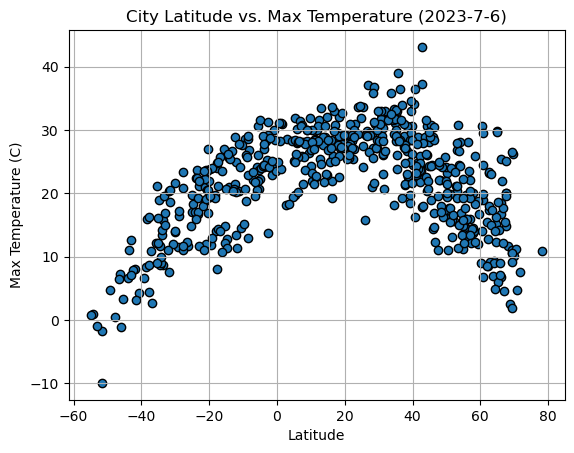

In [20]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Max Temp"], edgecolors= 'black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-7-6)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

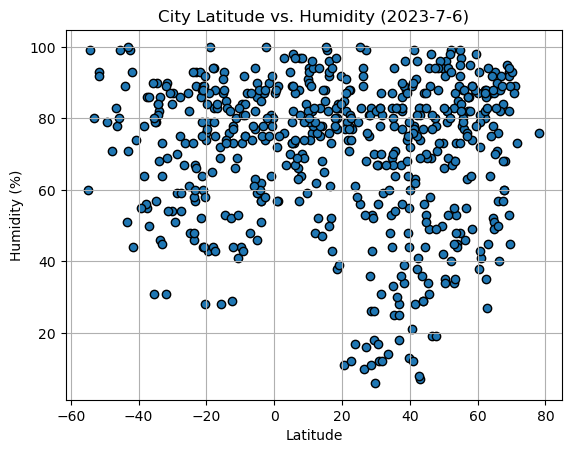

In [19]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Humidity"], edgecolors= 'black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-7-6)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

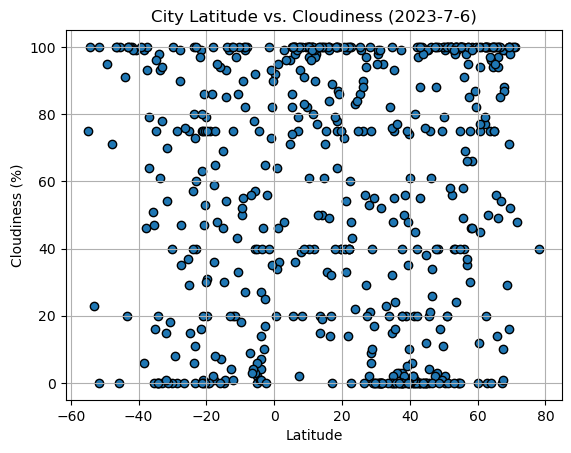

In [18]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Cloudiness"], edgecolors= 'black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-7-6)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

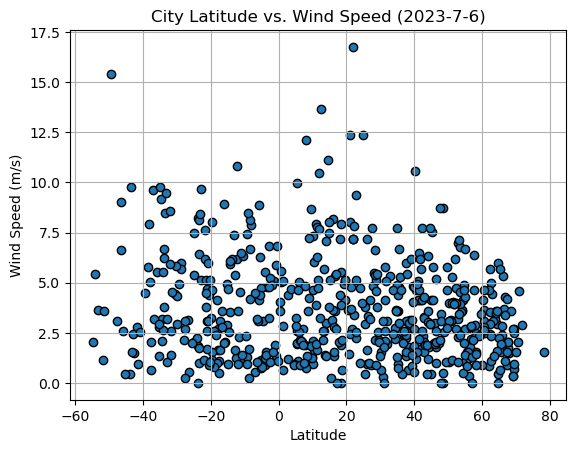

In [21]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Wind Speed"], edgecolors= 'black')
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-7-6)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,isafjordur,66.0755,-23.1240,6.76,88,97,5.32,IS,1690430265
2,iqaluit,63.7506,-68.5145,6.85,87,75,3.09,CA,1690430266
4,georgetown,5.4112,100.3354,31.96,82,20,2.57,MY,1690430048
6,ust-nera,64.5667,143.2000,15.07,52,94,2.94,RU,1690430266
7,thompson,55.7435,-97.8558,13.09,88,100,1.54,CA,1690430266


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-1.84,93,100,1.12,CL,1690430265
3,port-aux-francais,-49.3500,70.2167,4.72,79,95,15.39,TF,1690430138
5,ancud,-41.8697,-73.8203,8.03,93,100,2.81,CL,1690430266
9,waitangi,-43.9535,-176.5597,6.57,89,91,0.45,NZ,1690430267
11,itacare,-14.2775,-38.9967,21.05,85,54,3.54,BR,1690430267


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6067893215217508


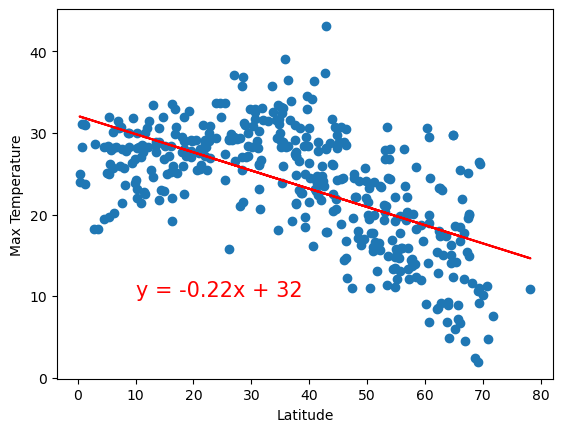

In [28]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
coeff = linregress(x, y)
print(f"The r-value is: {coeff.rvalue}")

plt.scatter(x , y)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

regression_values = coeff.slope * x + coeff.intercept
line_eq = f"y = {round(coeff.slope, 2)}x + {round(coeff.intercept)}"

plt.plot(x, regression_values, "r-")
plt.annotate(line_eq, (10,10), fontsize = 15, color = "Red")

# Show plot
plt.show()

The r-value is: 0.7954976109648715


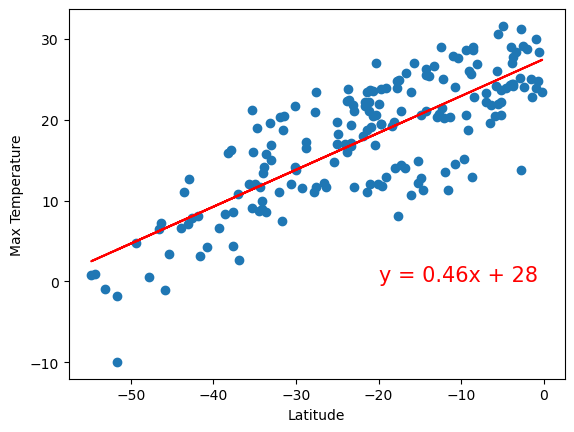

In [32]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x =southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
coeff = linregress(x, y)
print(f"The r-value is: {coeff.rvalue}")

plt.scatter(x , y)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

regression_values = coeff.slope * x + coeff.intercept
line_eq = f"y = {round(coeff.slope, 2)}x + {round(coeff.intercept)}"

plt.plot(x, regression_values, "r-")
plt.annotate(line_eq, (-20,0), fontsize = 15, color = "Red")

# Show plot
plt.show()

**Discussion about the linear relationship:** Max temp increases as one approaches the equator from either the north or the south. This relationship is strongly supported by the model, with an r value of 0.8

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.03674277071821181


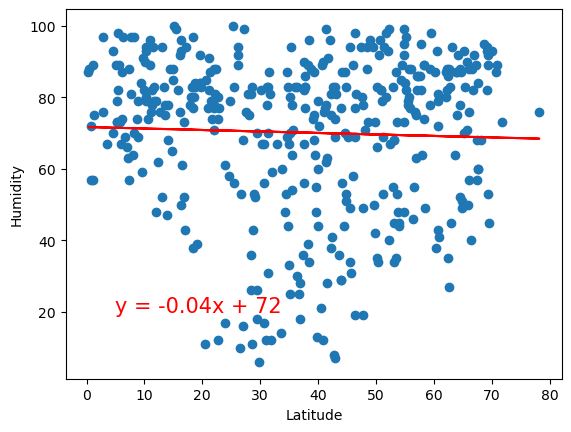

In [35]:
# Northern Hemisphere
# YOUR CODE HERE
# Southern Hemisphere
# YOUR CODE HERE
x =northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
coeff = linregress(x, y)
print(f"The r-value is: {coeff.rvalue}")

plt.scatter(x , y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

regression_values = coeff.slope * x + coeff.intercept
line_eq = f"y = {round(coeff.slope, 2)}x + {round(coeff.intercept)}"

plt.plot(x, regression_values, "r-")
plt.annotate(line_eq, (5,20), fontsize = 15, color = "Red")

# Show plot
plt.show()

The r-value is: -0.03556082722616119


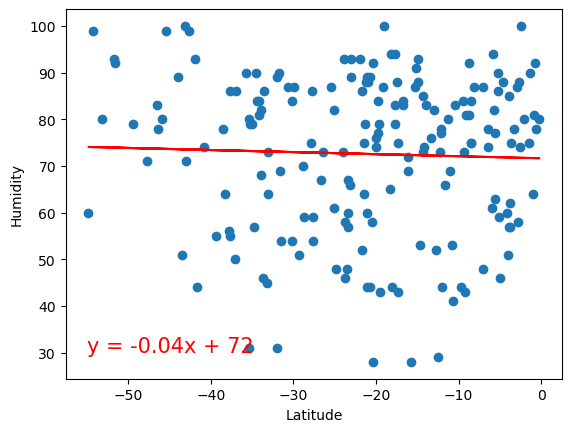

In [37]:
# Southern Hemisphere
# YOUR CODE HERE
x =southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
coeff = linregress(x, y)
print(f"The r-value is: {coeff.rvalue}")

plt.scatter(x , y)
plt.xlabel("Latitude")
plt.ylabel("Humidity")

regression_values = coeff.slope * x + coeff.intercept
line_eq = f"y = {round(coeff.slope, 2)}x + {round(coeff.intercept)}"

plt.plot(x, regression_values, "r-")
plt.annotate(line_eq, (-55,30), fontsize = 15, color = "Red")

# Show plot
plt.show()

**Discussion about the linear relationship:** Latitude and humidity do not show much correlation. Calculated r-values are very small, near 0 for Northern and Southern datasets.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.018265276720381377


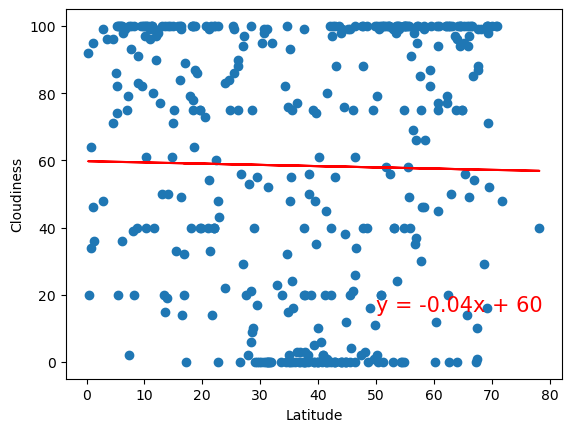

In [39]:
# Northern Hemisphere
# YOUR CODE HERE
x =northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
coeff = linregress(x, y)
print(f"The r-value is: {coeff.rvalue}")

plt.scatter(x , y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

regression_values = coeff.slope * x + coeff.intercept
line_eq = f"y = {round(coeff.slope, 2)}x + {round(coeff.intercept)}"

plt.plot(x, regression_values, "r-")
plt.annotate(line_eq, (50,15), fontsize = 15, color = "Red")

# Show plot
plt.show()

The r-value is: -0.16585083192984504


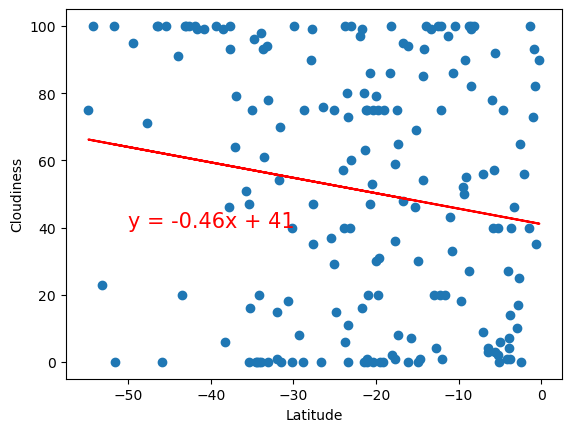

In [41]:
# Southern Hemisphere
# YOUR CODE HERE
x =southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
coeff = linregress(x, y)
print(f"The r-value is: {coeff.rvalue}")

plt.scatter(x , y)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

regression_values = coeff.slope * x + coeff.intercept
line_eq = f"y = {round(coeff.slope, 2)}x + {round(coeff.intercept)}"

plt.plot(x, regression_values, "r-")
plt.annotate(line_eq, (-50, 40), fontsize = 15, color = "Red")

# Show plot
plt.show()

**Discussion about the linear relationship:**  Latitude and cloudiness do not show much correlation. Calculated r-values are very small, near 0 for Northern and Southern datasets.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.21226407550343038


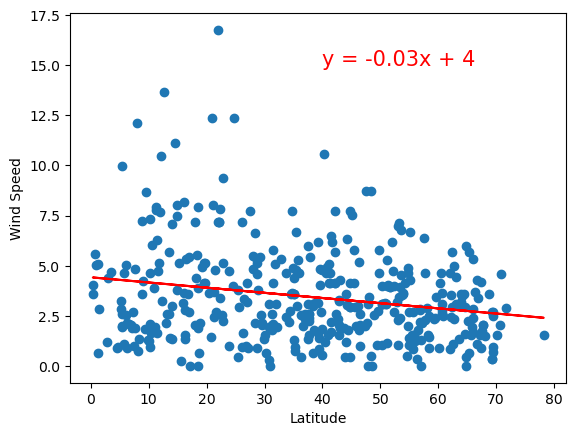

In [44]:
# Northern Hemisphere
# YOUR CODE HERE
x =northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
coeff = linregress(x, y)
print(f"The r-value is: {coeff.rvalue}")

plt.scatter(x , y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

regression_values = coeff.slope * x + coeff.intercept
line_eq = f"y = {round(coeff.slope, 2)}x + {round(coeff.intercept)}"

plt.plot(x, regression_values, "r-")
plt.annotate(line_eq, (40,15), fontsize = 15, color = "Red")

# Show plot
plt.show()

The r-value is: -0.11704515093095655


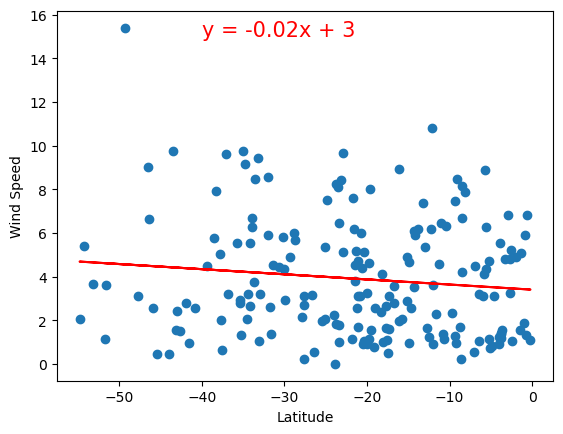

In [46]:
# Southern Hemisphere
# YOUR CODE HERE
x =southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
coeff = linregress(x, y)
print(f"The r-value is: {coeff.rvalue}")

plt.scatter(x , y)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

regression_values = coeff.slope * x + coeff.intercept
line_eq = f"y = {round(coeff.slope, 2)}x + {round(coeff.intercept)}"

plt.plot(x, regression_values, "r-")
plt.annotate(line_eq, (-40, 15), fontsize = 15, color = "Red")

# Show plot
plt.show()

**Discussion about the linear relationship:** Latitude and wind speed do not show much correlation. Calculated r-values are very small, near 0 for Northern and Southern datasets.